In [1]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Experiment 3

In [4]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Dataset_2.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [5]:
train_csv2  = pd.read_csv('/content/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/Dataset_2/verification_test.csv')

In [6]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [7]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [8]:
print(len(train_set))
print(len(test_set))

60000
10000


In [9]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.844927966594696. Accuracy: 78.26
Iteration: 1000. Loss: 0.5342625379562378. Accuracy: 79.91
Iteration: 1500. Loss: 0.22071707248687744. Accuracy: 80.58
Iteration: 2000. Loss: 0.32207849621772766. Accuracy: 82.85
Iteration: 2500. Loss: 0.7806776762008667. Accuracy: 81.85
Iteration: 3000. Loss: 0.40754127502441406. Accuracy: 84.43
Iteration: 3500. Loss: 0.3720966875553131. Accuracy: 83.98
Iteration: 4000. Loss: 0.5984009504318237. Accuracy: 83.78
Iteration: 4500. Loss: 0.2792279124259949. Accuracy: 85.96
Iteration: 5000. Loss: 0.6601005792617798. Accuracy: 85.93
Iteration: 5500. Loss: 0.3023870885372162. Accuracy: 85.48
Iteration: 6000. Loss: 0.7776738405227661. Accuracy: 86.91
Iteration: 6500. Loss: 0.4310669004917145. Accuracy: 85.07
Iteration: 7000. Loss: 0.4212283194065094. Accuracy: 85.68
Iteration: 7500. Loss: 0.09715777635574341. Accuracy: 87.23
Iteration: 8000. Loss: 0.38169851899147034. Accuracy: 87.04
Iteration: 8500. Loss: 0.2357492446899414. Accuracy: 

[0.6538705229759216, 0.4414617419242859, 0.7060843706130981, 0.6090282201766968, 0.27332040667533875, 0.5749495029449463, 0.6689385175704956, 0.4866218566894531, 0.1841004341840744, 0.7911199331283569, 0.2194070816040039, 0.42351585626602173, 0.3640749454498291, 0.5355470180511475, 0.17288999259471893, 0.7089505195617676, 0.11387046426534653, 0.800849437713623, 0.2131715714931488, 0.3363208472728729, 0.5210429430007935, 0.3831520974636078, 0.4135584831237793, 0.22635900974273682, 0.6149506568908691, 0.18949632346630096, 0.2439127415418625, 0.22930827736854553, 0.2660154402256012, 0.3184342384338379, 0.2245796173810959, 0.5093971490859985, 0.1982053518295288, 0.47364410758018494, 0.47286257147789, 0.39440682530403137]


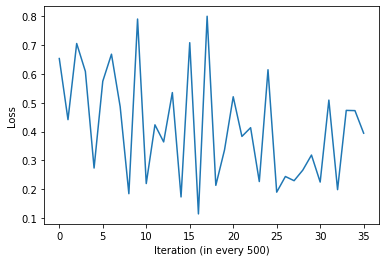

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

For experiment 2

In [10]:
# Hyperparameters

batch_size = 100
num_iters = 45000
input_dim = 28*28 # num_features = 784
num_hidden = 1000 # num of hidden nodes
output_dim = 10

learning_rate = 0.01  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)

         ### 4rd hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_4(out)

      ### 5rd hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)

      ### 6rd hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_6(out)
      
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.45789197087287903. Accuracy: 83.63
Iteration: 1000. Loss: 0.3187745213508606. Accuracy: 85.23
Iteration: 1500. Loss: 0.36066150665283203. Accuracy: 87.99
Iteration: 2000. Loss: 0.43407905101776123. Accuracy: 87.2
Iteration: 2500. Loss: 0.43197426199913025. Accuracy: 87.19
Iteration: 3000. Loss: 0.3879784047603607. Accuracy: 88.18
Iteration: 3500. Loss: 0.4549638628959656. Accuracy: 86.74
Iteration: 4000. Loss: 0.2637764811515808. Accuracy: 88.84
Iteration: 4500. Loss: 0.2971224784851074. Accuracy: 89.07
Iteration: 5000. Loss: 0.2615465819835663. Accuracy: 89.01
Iteration: 5500. Loss: 0.27468234300613403. Accuracy: 87.42
Iteration: 6000. Loss: 0.20555420219898224. Accuracy: 88.63
Iteration: 6500. Loss: 0.34566619992256165. Accuracy: 87.73
Iteration: 7000. Loss: 0.2504616677761078. Accuracy: 88.21
Iteration: 7500. Loss: 0.13210414350032806. Accuracy: 89.1
Iteration: 8000. Loss: 0.2074507772922516. Accuracy: 89.72
Iteration: 8500. Loss: 0.11178787052631378. Accurac

[0.45789197087287903, 0.3187745213508606, 0.36066150665283203, 0.43407905101776123, 0.43197426199913025, 0.3879784047603607, 0.4549638628959656, 0.2637764811515808, 0.2971224784851074, 0.2615465819835663, 0.27468234300613403, 0.20555420219898224, 0.34566619992256165, 0.2504616677761078, 0.13210414350032806, 0.2074507772922516, 0.11178787052631378, 0.1642274260520935, 0.23097474873065948, 0.22186951339244843, 0.05871479958295822, 0.11434201896190643, 0.07740695774555206, 0.08854298293590546, 0.06977982074022293, 0.10998285561800003, 0.11417502164840698, 0.1420830488204956, 0.1403798609972, 0.13143742084503174, 0.07111654430627823, 0.09916941821575165, 0.15514332056045532, 0.11787727475166321, 0.05162716284394264, 0.020811347290873528, 0.03594107925891876, 0.07689134776592255, 0.028631050139665604, 0.01785213127732277, 0.050261616706848145, 0.1588623970746994, 0.07564675062894821, 0.03631795570254326, 0.01755981519818306, 0.0668938085436821, 0.010894506238400936, 0.024927299469709396, 0.

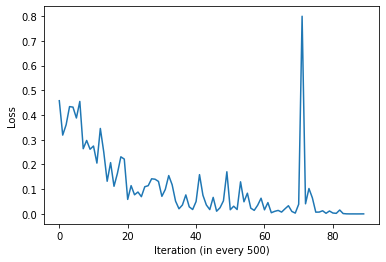

In [11]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()